<a href="https://colab.research.google.com/github/changsin/AI/blob/main/k_means_clustering_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering From Scratch
K-Means clustering is an iterative method to find clusters based on distances from the center point of each cluster called 'centroids'.

The algorithm is as follows:

1. Pick two random points as the initial centroids.
2. Put each data point to a cluster based on the distances between the centroids.
3. For each cluster, calculate the real centroids.
4. With the new centroids, regroup the points.
5. If any point changed its cluster with the new centroids, repeat 3-5.
6. If there is no change, you are done.

The following code implements the above algorithm with visualizations.

## 1. Generate sample points data

In [212]:
def gen_random_points(start, end, size):
  points = []

  while len(points) < size[0]:
    pt = np.random.randint(start, end, size=(1, size[1]))[0].tolist()

    # check for duplicates
    if pt in points:
      continue

    points.append(pt)

  return np.array(points)   

data1 = gen_random_points(0, 5, size=(5, 2))
data1
data2 = gen_random_points(6, 10, size=(5, 2))
data2

data = np.vstack((data1, data2))
print(data)

[[2 0]
 [0 3]
 [4 2]
 [4 3]
 [1 0]
 [9 6]
 [7 8]
 [8 9]
 [7 6]
 [9 9]]


## 2. Pick random points as centroids

In [213]:
centroids = gen_random_points(0, 10, size=(2, 2))
centroids

array([[6, 9],
       [7, 4]])

## 3. Cluster data points based on distance
To visualize the clustering process better, let's draw a middle line between two centroids which will be the dividing line between two clusters. Below is the formula to draw the dividing line. 

- Calculate the median point between the two centroids

In [194]:
def calc_midpoint(p1, p2):
  return (p1[0] + p2[0])/2, (p1[1] + p2[1])/2

- Some geometry methods to calculate the slope and y intercept of the dividing line.
 
 $$ y = sx + c $$

s is the slope and calculated with
- $ s = \frac{\text{x change}}{\text{y change}} $

c is the y-intercept
- $ c = y - sx $

The dividing line will be perpendicular to the line connecting two centroids so we will first come up with the connecting line formula and from there, we will calculate the perpendicular line passing through the median point of the two centroids.

So the dividing line will be

$$ y = mx + b $$

where
- $ m = \Large{ -\frac{1}{s}} $
- $ b = y - mx $

In [214]:
def get_slope(pt1, pt2):
  """
  calculates the slope given two points
  """
  denominator = pt1[0] - pt2[0]
  numerator = pt1[1] - pt2[1]

  if denominator != 0:
    return float(numerator/denominator)

  return 0

def get_y_int(pt, m):
  """
  calculates the y-intercept given a point and the slope
  """
  return pt[1] - m * pt[0]

Let's now use the above methods to calculate the line formula for the dividing line.

In [221]:
def calc_dividing_line(pt1, pt2):
  n = get_slope(pt1, pt2)
  c = get_y_int(pt2, n)

  m = -1/n
  mid = calc_midpoint(pt1, pt2)
  b = get_y_int(mid, m)

  return m, b

In [218]:
def cluster_two(points, m, b):
  """
  Clusters each point given the diving line formula
  """
  cluster1 = []
  cluster2 = []
  # for each point, check if it's above and below the line
  for pt in points:
    x, y = pt
    y1 = m*x + b

    if y1 > y:
      print("x, y is cluster1", x, y, "y1", y1)
      cluster1.append(pt)
    else:
      print("x, y is cluster2", x, y, "y1", y1)
      cluster2.append(pt)

  clusters = dict()
  clusters[0] = np.array(cluster1)
  clusters[1] = np.array(cluster2)

  return clusters

In [225]:
def cluster_with_centroids(data, centroids):
  m, b = calc_dividing_line(centroids[0], centroids[1])
  y1 = m*x1 + b

  clusters = cluster_two(data, m, b)

  return clusters, m, b

In [222]:
x1 = np.linspace(0, 10, 100)


### Cluster
For each point, we can calculate the distances and decide the proper cluster, but this is equivalent to drawing a dividing line and checking if it is above or below the line. Let's use the latter method to make visualization easier.

In [226]:
clusters, m, b = cluster_with_centroids(data, centroids)

x, y is cluster1 2 0 y1 5.6000000000000005
x, y is cluster1 0 3 y1 5.2
x, y is cluster1 4 2 y1 6.0
x, y is cluster1 4 3 y1 6.0
x, y is cluster1 1 0 y1 5.4
x, y is cluster1 9 6 y1 7.0
x, y is cluster2 7 8 y1 6.6000000000000005
x, y is cluster2 8 9 y1 6.800000000000001
x, y is cluster1 7 6 y1 6.6000000000000005
x, y is cluster2 9 9 y1 7.0


### Plot
Now let's plot.

In [208]:
import matplotlib.pyplot as plt

def plot_data(data, ax=None, label='+'):
  if not ax:
    fig, ax = plt.subplots()
  
  ax.plot(data[:, 0], data[:, 1], marker='o', linestyle='', ms=12, label=label)

  return ax

In [227]:
def plot_clusters_with_line(clusters, centroids, x1, y1):
  fig, ax = plt.subplots()
  for id, cluster in clusters.items():
    ax = plot_data(cluster, ax=ax)

  ax.scatter(centroids[:, 0], centroids[:, 1], color='red')

  mid = calc_midpoint(centroids[0], centroids[1])

  ax.scatter(mid[0], mid[1], color='orange')

  ax.plot(x1, y1, 'g', label='y=wx+b')

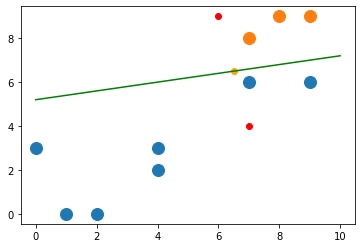

In [228]:
plot_clusters_with_line(clusters, centroids, x1, y1)

Obviously, the clustering is not what we expect so more iterations are needed.

## 4. Recalculate the centroids

In [220]:
def calculate_centroids(clusters):
  """
  Re-calculate the centroids
  """
  def _centroidnp(arr):
      length = arr.shape[0]
      sum_x = np.sum(arr[:, 0])
      sum_y = np.sum(arr[:, 1])
      return np.array([float(sum_x/length), float(sum_y/length)])

  centroids = []
  for id, points in clusters.items():
    centroid = _centroidnp(points)
    centroids.append(centroid)

  return np.array(centroids)

In [ ]:

centroids_new = calculate_centroids(clusters)
centroids_new

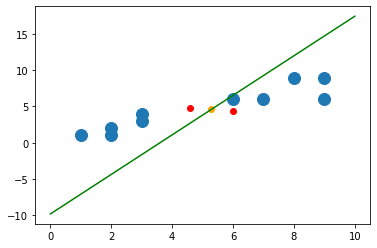

In [203]:
ax = plot_data(data)
ax.scatter(centroids_new[:, 0], centroids_new[:, 1], color='red')

mid_new = calc_midpoint(centroids_new[0], centroids_new[1])
ax.scatter(mid_new[0], mid_new[1], color='orange')


ax.plot(x1, y_new, 'g', label='y=wx+b')

In [165]:
centroid1

(1.0, 2.0)

In [166]:
centroid2

(8.0, 7.6)

## How to calculate the line formula between two points

1. calculate the midpoint
2. Find the x intercept: the x coordinate where y = 0 and equidistant from the initial two points

- A general line formula: $ y = ax + b $
- x intercept: $ 0 = ax + b $
- equidistance formula:



- y intercept: $ y = b
- slope formula
  - $ ax = y - b $
  - $ a = \frac{y - b}{x} $



In [139]:
def distance_euc(p1, p2):
  x1, y1 = p1
  x2, y2 = p2
  return ((((x2 - x1 )**2) + ((y2-y1)**2) )**0.5)


distance_euc(centroids[0], centroids[1])

5.0990195135927845

In [42]:
from scipy.spatial import distance

distance.euclidean(centroids[0], centroids[1])

72.0

In [41]:
np.sqrt(np.sum(np.square(centroids[0], centroids[1])))

9.055385138137417

In [26]:

def centeroidpython(data):
    x, y = zip(*data)
    l = len(x)
    return sum(x) / l, sum(y) / l

centeroidpython(data)


(4.4, 4.9)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

X = np.array([
      [6., 1.],
      [7., 3.],
      [8., 2.],    
      [9., 0.],
      [8., 4.],
      [8., 6.],
      [9., 2.],    
      [9., 5.]
    ])
# y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y):
  positives = X[y == 1]
  negatives = X[y == 0]

  fig, ax = plt.subplots()
  ax.plot(positives[:, 0], positives[:, 1], marker='o', linestyle='', ms=12, label='+')
  ax.plot(negatives[:, 0], negatives[:, 1], marker='o', linestyle='', ms=12, label='-')

  ax.legend()
  return ax

In [1]:
!git clone https://github.com/changsin/DLTrafficCounter

Cloning into 'DLTrafficCounter'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 277 (delta 17), reused 66 (delta 15), pack-reused 209
Receiving objects: 100% (277/277), 226.60 MiB | 28.01 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Checking out files: 100% (205/205), done.


In [2]:
import argparse
import glob
import os

import cv2
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from scipy.spatial.distance import cdist
from sklearn import preprocessing  # to normalise existing X
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

"""
"""

def glob_files(folder, file_type='*'):
    search_string = os.path.join(folder, file_type)
    files = glob.glob(search_string)

    # print('searching ', path)
    paths = []
    for f in files:
      if os.path.isdir(f):
        sub_paths = glob_files(f + '/')
        paths += sub_paths
      else:
        paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths

def load_images(path, file_type="*"):
  files = glob_files(path, file_type)

  # print(files)
  X_data = []
  for file in files:
    image = cv2.imread(file)
    # reduce image sizes
    image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    X_data.append(image)
  X_data = np.array(X_data)
  print("Loaded {}".format(X_data.shape))
  return X_data

def find_duplicates(X_train_pca, threshold=0.1):
    # Calculate distances of all points
    distances = cdist(X_train_pca, X_train_pca)

    # Find duplicates (very similar images)
    # dupes = np.array([np.where(distances[id] < 1) for id in range(distances.shape[0])]).reshape(-1)
    dupes = [np.array(np.where(distances[id] < threshold)).reshape(-1).tolist() \
            for id in range(distances.shape[0])]

    to_remove = set()
    for d in dupes:
        if len(d) > 1:
            for id in range(1, len(d)):
                to_remove.add(d[id])
    logger.info("Found {} duplicates".format(len(to_remove)))
    return to_remove

def get_feature_maps(X):
    #Convert to VGG input format
    X = preprocess_input(X)

    #include_top=False == not getting VGG16 last 3 layers
    model = VGG16(weights="imagenet", include_top=False)
    # model = VGG16(weights = None, include_top=False)
    #Get features
    features = model.predict(X)
    print(features.shape)

    return features


def get_pca_reduced(X_features, dimensions=2):
  X_features_flatten = X_features.reshape(X_features.shape[0], -1)
  pca = PCA(dimensions)

  X_features_pca_reduced = pca.fit_transform(X_features_flatten)

  return X_features_pca_reduced, pca


def get_clusters(X_reduced, K):
  kmeans = KMeans(n_clusters=K, random_state=0)
  X_clusters = kmeans.fit(X_reduced)

  return X_clusters, kmeans

def to_cluster_idx(cluster_labels, bins):
    """
    param labels: cluster labels
    param bins: range of K
    returns: dictionary of cluster IDs
    """
    cluster_dict = dict()
    for cluster_id in bins:
        cluster_dict[cluster_id] = np.where(cluster_labels == cluster_id)[0]
    return cluster_dict

def cluster_images(folder):
    X_data = load_images(folder, "*.png")

    # get feature maps
    X_features = get_feature_maps(X_data)

    # normalize
    X_fm_normalized = preprocessing.normalize(X_features.reshape(len(X_features), -1))

    # dimensionality reduction through PCA
    X_reduced, pca = get_pca_reduced(X_fm_normalized, dimensions=2)

    return X_reduced, pca

In [ ]:
def process_image_one_at_a_time(path, file_type="*.png"):
    files = glob_files(path, file_type)

    fm_reduced = []
    for file in files:
      print(file)
      image = cv2.imread(file)
      image = cv2.resize(image, (320, 320))
      print(image.shape)
      fm = get_feature_maps(np.array([image]))
      fm_reduced.append(fm)
      # x_reduced = get_pca_reduced(fm, dimensions=2)
      # fm_reduced.append(x_reduced)

    return np.array(fm_reduced)

def cluster_images(folder):
    fm_reduced = process_image_one_at_a_time(folder)

    return fm_reduced

In [3]:
X_features = cluster_images('/content/DLTrafficCounter/data/bbox_highway/test')

Loaded (5, 540, 960, 3)
58900480/58889256 [==============================] - 0s 0us/step
(5, 16, 30, 512)


In [ ]:
X_features.shape

(5, 1, 10, 10, 512)

In [ ]:
[i for i in range(2)]

[0, 1]

In [ ]:
# X_reduced = X_reduced.reshape(-1, 1)
X_features_flatten = X_features.reshape(X_features.shape[0], -1)

X_clusters, kmeans = get_clusters(X_features_flatten, 2)

In [ ]:
X_clusters.labels_


array([1, 1, 0, 0, 0], dtype=int32)

In [ ]:
X_clusters.cluster_centers_.shape

(2, 51200)

In [ ]:
X_reduced, pca = cluster_images('/content/DLTrafficCounter/data/bbox_highway/train')

Loaded (90, 540, 960, 3)
(90, 16, 30, 512)


In [ ]:
# cluster
X_clusters, kmeans = get_clusters(X_reduced, 2)

# get the image ids of each cluster
cluster_idx = to_cluster_idx(X_clusters.labels_, [0, 1])

# keep the cluster centers
print(kmeans.cluster_centers_)
print(cluster_idx)

[[-4.5856735e-01 -1.6710158e-04]
 [ 5.0122488e-01  1.8265484e-04]]
{0: array([ 2,  3,  4,  5,  6,  7, 14, 15, 16, 17, 18, 19, 26, 27, 28, 29, 30,
       31, 37, 38, 39, 40, 41, 42, 49, 50, 51, 52, 53, 54, 61, 62, 63, 64,
       65, 66, 73, 74, 75, 76, 77, 78, 85, 86, 87, 88, 89]), 1: array([ 0,  1,  8,  9, 10, 11, 12, 13, 20, 21, 22, 23, 24, 25, 32, 33, 34,
       35, 36, 43, 44, 45, 46, 47, 48, 55, 56, 57, 58, 59, 60, 67, 68, 69,
       70, 71, 72, 79, 80, 81, 82, 83, 84])}


# Plot clusters


In [ ]:
import matplotlib.pyplot as plt


def plot_pca_clusters(X_train_pca, kmeans):
    # kmeans, X_train_pca_clusters = get_clusters(X_train_pca)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(2)
    # plt.clf()
    plt.imshow(Z, interpolation="nearest",
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                cmap=plt.cm.Paired, aspect="auto", origin="lower")

    plt.plot(X_train_pca[:, 0], X_train_pca[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_

    # markers = ["o", "1", "2", "3", "4"]
    markers = ["o", "1", "2"]
    for id in range(len(centroids)):
        c = centroids[id]
        plt.scatter(c[0], c[1], marker=markers[id], s=169, linewidths=3,
                    color="w", zorder=10)

    # plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
    #             color="w", zorder=10)
    # https://matplotlib.org/2.0.2/api/markers_api.html#module-matplotlib.markers
    plt.title("K-means clustering on the PCA-reduced data\n"
                "Centroids 0-o, 1-down, 2-up, 3-left, 4-right tri")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

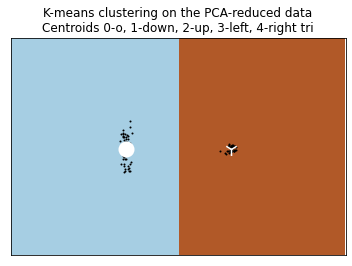

In [ ]:
plot_pca_clusters(X_reduced, kmeans)

In [ ]:
X_clusters.cluster_centers_

array([[-4.5856735e-01, -1.6710158e-04],
       [ 5.0122488e-01,  1.8265484e-04]], dtype=float32)